# Various figures

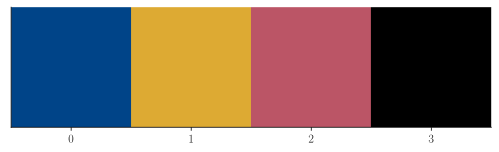

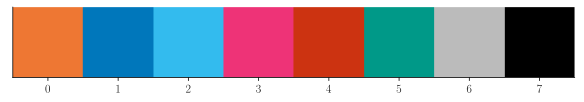

In [1]:
# MPL stuff
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.weight": "medium",
    "font.serif": "cmr10",  # cmr10 is part of Computer Modern Roman
    "axes.labelsize": 12,   # Corresponds to 12pt
    "font.size": 12,        # General font size
    "legend.fontsize": 12,  # Legend font size
    "xtick.labelsize": 12,  # X-axis tick label size
    "ytick.labelsize": 12,  # Y-axis tick label size
    'axes.formatter.use_mathtext': True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "legend.frameon": False,
})

from tol_colors import tol_cmap, tol_cset
cmap = tol_cset('vibrant')

import numpy as np

def plot_colours(cmap):
    colors = matplotlib.colors.ListedColormap(cmap)(np.arange(len(cmap)))
    
    # Display the colors
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.imshow([colors], extent=[0, len(cmap), 0, 1])
    ax.set_xticks(np.arange(len(cmap)) + 0.5)
    ax.set_xticklabels(np.arange(len(cmap)))
    ax.set_yticks([])  # Remove y-axis ticks
    plt.show()

# deriving ideal fig size
pt = 1./72.27
my_width = 426.79135*pt
golden = (1 + 5 ** 0.5) / 2
IDEAL_FIG_SIZE = (my_width, my_width/golden)

matplotlib.rcParams.update({
    "figure.figsize": IDEAL_FIG_SIZE,
    "figure.constrained_layout.use": True,
})

plot_colours(tol_cset('high-contrast'))
plot_colours(tol_cset('vibrant'))

## HBM: steps of $p_{\text{ITN}}$

In [ ]:
ORs = np.array([1,      # constant
                1.82,   # susceptibility
                2.78,   # severity
                1.47,   # benefits
                .53,    # barriers
                1.3,    # self-efficacy
                2.69    # cues to action
                ])


## PMT: Stochasticity in decision

In [2]:
threat_minmax = [.5*((0.5+0) - (1 + 1)), .5*((0.5+1) - (0 + 0))]
coping_minmax = [.5*(0 + 0) - 1, .5*(1 + 1) - 0]

threat_minmax, coping_minmax

([-0.75, 0.75], [-1.0, 1.0])

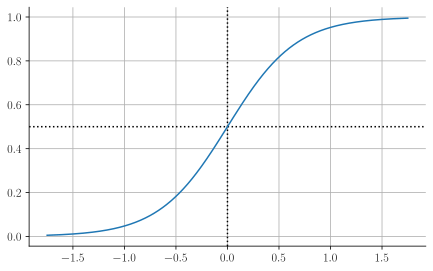

In [6]:
# sigmoid(diff between threat & coping)

diffs = np.linspace(coping_minmax[0]-threat_minmax[1],
                    coping_minmax[1]-threat_minmax[0],
                    10_000)

plt.grid()
plt.axhline(.5, c='black', ls='dotted')
plt.axvline(0, c='black', ls='dotted')

plt.plot(diffs, 1/(1+np.e**(-3*diffs)))
plt.show()

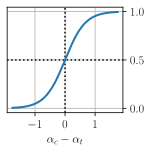

In [24]:
# sigmoid(diff between threat & coping)

plt.figure(figsize=(2,2))

plt.gca().spines["right"].set_visible(True)
plt.gca().spines["top"].set_visible(True)

diffs = np.linspace(coping_minmax[0]-threat_minmax[1],
                    coping_minmax[1]-threat_minmax[0],
                    10_000)

plt.grid()
plt.axhline(.5, c='black', ls='dotted')
plt.axvline(0, c='black', ls='dotted')

plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.plot(diffs, 1/(1+np.e**(-3*diffs)), lw=2)
plt.xlabel(r"$\alpha_c-\alpha_t$")
# plt.ylabel(r"$p_{\mathrm{ITN}}$")
plt.savefig("pmt-itn-function.svg")

In [4]:
1/(1+np.e**(-3*1))

0.9525741268224331